# The normal distribution

```{attention}
Follow the lesson and fill your student notebooks using Binder.<br/>
<a href="https://mybinder.org/v2/gh/jdaled/geo-python_UPD/dev-upd?urlpath=lab/tree/source/notebooks/L8/normal-distribution.ipynb"><img alt="Binder badge" src="https://img.shields.io/badge/launch-binder-red.svg" style="vertical-align:text-bottom"></a>
```

The {term}`normal distribution`, also known as the *Gaussian*, refers to the mathematical function used to describe the bell-shaped curve of expected values for any measurement subject to small random errors. Probably most of you have already seen this distribution before, and here we briefly outline its definition and use.

![The normal distribution](img/Gaussian.png)

_**Figure 1.5**. The normal distribution of cinder code slope angles. Source: Figure 7.1 from [McKillup and Dyar, 2010](http://www.cambridge.org/fi/academic/subjects/earth-and-environmental-science/earth-science-general-interest/geostatistics-explained-introductory-guide-earth-scientists?format=HB&isbn=9780521763226)._


Many geological values can be described using the *normal distribution*, where the most common measured values are proximal to the *mean*, but small numbers of measurements may have values quite far from the mean. The example in Figure 1.5 is for the slope angles of cinder cones, which may be expected to be similar in many cases. This might relate to the angle of repose of the cinders that form the cone.

![The normal distribution and standard deviations](img/Gaussian-sd.png)

_**Figure 1.6**. The relationships between the normal distribution and standard deviation. Source: Figure 7.3 from [McKillup and Dyar, 2010](http://www.cambridge.org/fi/academic/subjects/earth-and-environmental-science/earth-science-general-interest/geostatistics-explained-introductory-guide-earth-scientists?format=HB&isbn=9780521763226)._


Assuming we have a representative sample, the *standard deviation* can be related to the percentage of measurements that would be expected to fall within some distance from the *mean*. If the sample is representative, the sample mean $\bar{x}$ and population mean $\mu$ should be the same. In this case, ~68% of measurements should be within plus/minus one standard deviation of the mean, and ~95% should fall within plus/minus two standard deviations.

You will learn more about the *normal distribution* in the exercise for this week.

Below are example plots using the temperature data in Mactan airport.

<AxesSubplot:xlabel='TEMP', ylabel='Count'>

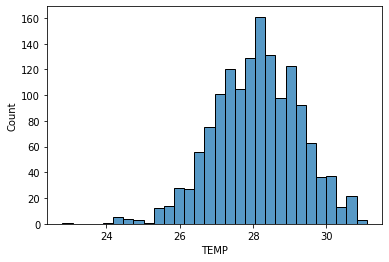

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fp = r"data/ph_tempdata.csv"

data = pd.read_csv(
    fp,
    na_values=["***"],
    usecols=["DATE", "STATION", "TEMP", "MAX", "MIN"],
    parse_dates=["DATE"],
    index_col="DATE",
)

# convert temperatures from Farenheit to Celsius
data["TEMP"] = (data["TEMP"] - 32)/1.8
data["MAX"] = (data["MAX"] - 32)/1.8
data["MIN"] = (data["MIN"] - 32)/1.8

# get only the data from the Mactan airport using the station code
data = data.loc[data["STATION"] == "RPM00098646"]

sns.histplot(data["TEMP"])

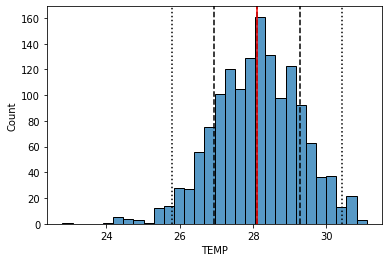

In [60]:
data_Tmean = data["TEMP"].mean(skipna=True)
data_Tstd = data["TEMP"].std()

data_Tmode = data["TEMP"].mode()

sns.histplot(data["TEMP"])
plt.axvline(data_Tmean, color="k", linestyle="--")
plt.axvline(data_Tmode[0], color="r", linestyle="-")

# plotting the standard deviation and 2 times the standard deviation from the mean
plt.axvline(data_Tmean - data_Tstd, color="k", linestyle="--")
plt.axvline(data_Tmean + data_Tstd, color="k", linestyle="--")
plt.axvline(data_Tmean - (2*data_Tstd), color="k", linestyle=":")
plt.axvline(data_Tmean + (2*data_Tstd), color="k", linestyle=":")
